In [1]:
import sys,os
from datetime import datetime
from pathlib import Path
import sqlite3
import pandas as pd
import numpy as np
import backtrader as bt # 导入 Backtrader
import akshare as ak
# import backtrader.indicators as btind # 导入策略分析模块
# import backtrader.feeds as btfeeds # 导入数据模块

# 快速连接数据库
class fast_db_conn:
    def __init__(self,db_path):
        self._db = db_path
    def __enter__(self):
        self._conn = sqlite3.connect(self._db)
        print("打开连接 {}".format(self._db))
        return self._conn
    def __exit__(self, exc_type, exc_val, exc_tb):
        self._conn.commit()
        self._conn.close()
        print("关闭连接 {}".format(self._db))

# 声明路径
cur_path = Path(r'.')
print("当前路径为 {}".format(cur_path.resolve()))
gitee_path = cur_path / Path(r'./../../..')    # D:/gitee
db_file_path = gitee_path / Path(r'./finance/db')     # D:/gitee/db
db_file_path = Path(r'D:\gitee\finance\db')  # backtrader项目下先写死
print("数据路径为 {}".format(db_file_path.resolve()))

# sql 语句
sql = {}
sql['simple-data'] = """
    select date,code,name,open,high,low,close from stock_all_221102 where date < '{end_date}' and date >= '{start_date}'
""".strip()

sql['data_spot'] = """
    select * from stock_spot 
""".strip()

sql['data_hfq'] = """
    select * from stock_hfq
""".strip()

# 取22年数据
dbname = [
    'em_stock_2022_1.db',
    'em_stock_2022_2.db',
    'em_stock_2022_3.db',
    'em_stock_2022_4.db',
]

dbpath = db_file_path / Path(dbname[0])
dbpath.resolve()

当前路径为 D:\github\backtrader\playGround\jupyterFile\bt
数据路径为 D:\gitee\finance\db


WindowsPath('D:/gitee/finance/db/em_stock_2022_1.db')

In [2]:
stock_hfq = []
# 读取数据
for i,db in enumerate(dbname):
    with fast_db_conn((db_file_path / Path(db)).resolve()) as c:
        data = pd.read_sql(sql=sql['data_hfq'], con = c, parse_dates=['d'])
        print('{}  {}'.format(datetime.now(),data.shape))
        stock_hfq.append(data)

data = pd.concat(stock_hfq, ignore_index=True)
data.head()

打开连接 D:\gitee\finance\db\em_stock_2022_1.db
2023-01-24 18:53:45.094177  (274032, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_1.db
打开连接 D:\gitee\finance\db\em_stock_2022_2.db
2023-01-24 18:53:46.630600  (282131, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_2.db
打开连接 D:\gitee\finance\db\em_stock_2022_3.db
2023-01-24 18:53:48.073746  (316312, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_3.db
打开连接 D:\gitee\finance\db\em_stock_2022_4.db
2023-01-24 18:53:49.492867  (299536, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_4.db


,d,open,close,high,low,volume,price_volume,amplitude,p_change,price_change,turnover,code,record_date
0,2022-01-04,45.43,45.70,46.58,45.19,206882,397126992.0,3.08,1.20,0.54,4.86,002222,2022-11-19
1,2022-01-05,45.23,43.68,45.55,42.73,276311,506863760.0,6.17,-4.42,-2.02,6.49,002222,2022-11-19
2,2022-01-06,43.50,43.54,43.84,42.62,128472,232326894.0,2.79,-0.32,-0.14,3.02,002222,2022-11-19
3,2022-01-07,43.72,42.51,44.24,42.40,151622,272725584.0,4.23,-2.37,-1.03,3.56,002222,2022-11-19
4,2022-01-10,42.62,43.36,44.53,42.13,175901,319923328.0,5.65,2.00,0.85,4.13,002222,2022-11-19


In [3]:
# 读取沪深300
# in_300 = ak.index_stock_cons_csindex(symbol="000300")["成分券代码"].unique()
in_300 = ['600031', '300763', '600989', '300782', '601698', '601236','002064', '000876', '601088', '601628', '601988', '003816','688036', '688363', '688111', '601658', '601816', '688169','688396', '688005', '000786', '000723', '600745', '002008','002007', '002049', '601898', '601919', '300122', '600918', '688599', '688981', '688561', '300896', '300999', '300919', '300124', '600183', '600009', '300979', '688303', '688187', '601868', '600941', '601998', '601600', '600196', '600426', '601899', '002493', '601166', '600999', '300014', '600150', '600010', '600690', '600845', '002352', '601857', '601939', '002129', '601390', '600837', '600132', '600115', '600104', '002202', '300059', '002311', '000938', '600406', '600061', '600309', '600460', '600436', '600029', '601336', '300207', '002555', '002594', '002602', '601901', '600036', '000776', '600089', '600884', '600085', '002601', '000596', '300316', '601633', '601669', '000408', '000001', '000002', '000651', '000661', '000733', '000858', '002050', '600048', '002236', '601111', '000301', '000538', '000568', '601012', '601238', '601800', '603993', '000333', '603806', '300347', '603899', '603799', '601689', '600958', '002756', '601985', '300529', '603986', '601229', '300595', '002841', '601881', '300601', '300628', '603659', '002916', '601838', '601360', '603259', '300454', '601066', '300760', '300751', '600926', '603185', '601615', '300759', '601865', '300769', '688008', '688012', '002271', '002475', '601766', '601668', '002304', '601688', '000100', '600438', '603290', '603195', '601808', '601288', '002001', '601117', '688126', '603392', '688065', '601995', '300957', '600018', '600763', '600383', '600588', '600019', '600016', '600011', '600674', '002459', '002460', '605117', '605499', '600905', '601728', '001289', '000338', '600276', '600000', '002466', '601888', '002410', '002180', '002230', '601601', '002414', '002179', '601788', '002142', '601009', '002074', '600606', '600660', '601877', '300015', '600188', '600039', '600900', '600332', '600176', '600600', '600028', '600346', '600886', '002252', '601989', '300033', '601186', '601318', '600741', '601006', '002120', '601618', '600219', '000977', '601818', '002415', '601377', '000800', '002371', '002241', '601328', '601169', '000877', '000895', '600547', '600015', '600760', '600795', '600111', '600809', '600030', '600803', '600362', '600233', '600584', '601799', '000963', '600570', '000425', '600585', '000768', '000792', '600519', '600887', '600893', '600050', '300223', '002600', '601216', '601100', '300274', '000708', '002027', '002032', '601398', '300142', '000063', '000069', '000157', '000625', '000725', '002648', '002709', '002714', '601225', '603288', '603369', '603019', '300408', '002736', '300413', '601021', '000166', '300433', '300450', '601211', '300498', '601155', '300496', '001979', '601966', '600919', '002812', '002821', '603833', '603501', '300661', '601878', '603882', '603260', '600025', '002920', '603486', '601138', '300750', '002938', '601319']

In [4]:
df = data.loc[:,['code','d','open','high','low','close','volume']]
df = df[df.code.isin(in_300)]
col_map={"d":"datetime"}
df = df.rename(columns=col_map)
df['openinterest'] = 0

code = df.loc[:,'code'].unique()
st_date = df.datetime.min()
ed_date = df.datetime.max()
print(df.shape)
df.head()

(72540, 8)


,code,datetime,open,high,low,close,volume,openinterest
638,000725,2022-01-04,17.37,17.47,17.24,17.47,5029016,0
639,000725,2022-01-05,17.47,17.69,17.37,17.60,5515826,0
640,000725,2022-01-06,17.53,17.53,17.34,17.40,3731059,0
641,000725,2022-01-07,17.50,17.79,17.47,17.69,6154201,0
642,000725,2022-01-10,17.76,17.92,17.66,17.79,5160839,0


In [44]:
class myStrategy(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict( # params可以简写为p 
        pfast=5,  # period for the fast moving average
        pslow=10,   # period for the slow moving average
        printlog=True,
    )  
    def log(self, arg):
        print('{} {}'.format(self.datetime.date(), arg))
    
    def log(self, txt, dt=None, do_print=False):
        """
        Logging function fot this strategy
        """
        if self.params.printlog or do_print:
            dt = dt or self.datetime.date()
            print('%s, %s' % (dt.isoformat(), txt))
            
    def notify_order(self, order):
        """
        记录交易执行情况
        """
        # 如果 order 为 submitted/accepted,返回空
        if order.status in [order.Submitted, order.Accepted]:
            return
        # 如果order为buy/sell executed,报告价格结果
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f"买入 {order.data._name} {order.executed.size}手:\n价格：{order.executed.price},\
                成本:{order.executed.value},\
                手续费:{order.executed.comm}"
                )
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(
                    f"卖出 {order.data._name} {order.executed.size}手:\n价格：{order.executed.price},\
                成本: {order.executed.value},\
                手续费{order.executed.comm}"
                )
            self.bar_executed = len(self)

            # 如果指令取消/交易失败, 报告结果
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("交易失败")
        self.order = None

    def notify_trade(self, trade):
        """
        记录交易收益情况
        """
        if not trade.isclosed:
            return
        self.log(f"策略收益：\n毛收益 {trade.pnl:.2f}, 净收益 {trade.pnlcomm:.2f}")

    def stop(self):
        """
        回测结束后输出结果
        """
        # self.log("(MA均线： %2d日) 期末总资金 %.2f" % (self.params.maperiod, self.broker.getvalue()), do_print=True)


    def __init__(self):
        sma_5 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma_15 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma_5, sma_15)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

In [45]:
%%time
cerebro = bt.Cerebro()
code = ['600031', '300763', '600989', '300782','000001',]
for c in code:
    temp = df.query(f"code=='{c}'").set_index('datetime').drop(columns=['code'])
    datafeed1 = bt.feeds.PandasData(dataname=temp, fromdate=st_date, todate=ed_date)
    cerebro.adddata(datafeed1, name=c)


CPU times: total: 46.9 ms
Wall time: 42.9 ms


In [46]:
cerebro.addstrategy(myStrategy)
startcash = 300000
cerebro.broker.setcash(startcash) 
cerebro.broker.setcommission(commission=0.0003) 
cerebro.addsizer(bt.sizers.FixedSize, stake=100)  #每次固定交易100股

cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')  # 返回收益率时序
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='_SharpeRatio')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='_DrawDown')
cerebro.addanalyzer(bt.analyzers.TimeDrawDown, _name='_TimeDrawDown')
cerebro.addanalyzer(bt.analyzers.PositionsValue, _name='_PositionsValue')

In [47]:
%%time
result = cerebro.run()
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(f'期初总资金: {round(startcash,2)}')
print(f'期末总资金: {round(portvalue,2)}')
print(f'净收益: {round(pnl,2)}')

2022-02-17, 买入 600031:
价格:889.17,                成本:88917.0,                手续费:26.675099999999997
2022-02-18, 卖出:
价格：878.07,                成本: 88917.0,                手续费26.342100000000002
2022-02-18, 策略收益：
毛收益 -1110.00, 净收益 -1163.02
2022-03-23, 买入 600031:
价格:767.46,                成本:76746.0,                手续费:23.0238
2022-03-30, 卖出:
价格：737.61,                成本: 76746.0,                手续费22.1283
2022-03-30, 策略收益：
毛收益 -2985.00, 净收益 -3030.15
2022-04-07, 买入 600031:
价格:768.99,                成本:76899.0,                手续费:23.0697
2022-04-20, 卖出:
价格：770.9,                成本: 76899.0,                手续费23.127
2022-04-20, 策略收益：
毛收益 191.00, 净收益 144.80
2022-05-10, 买入 600031:
价格:690.91,                成本:69091.0,                手续费:20.7273
2022-05-16, 卖出:
价格：721.53,                成本: 69091.0,                手续费21.645899999999997
2022-05-16, 策略收益：
毛收益 3062.00, 净收益 3019.63
2022-05-20, 买入 600031:
价格:702.4,                成本:70240.0,                手续费:21.072
2022-07-12, 卖出:
价格：825.25,       

<IPython.core.display.Javascript object>

2022-01-04    0.000000
2022-01-05    0.000000
2022-01-06    0.000000
2022-01-07    0.000000
2022-01-10    0.000000
                ...   
2022-12-26   -0.001403
2022-12-27    0.000603
2022-12-28    0.006817
2022-12-29    0.003586
2022-12-30   -0.002779
Length: 242, dtype: float64

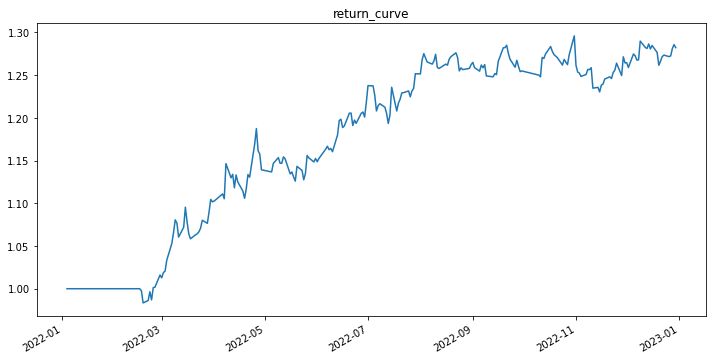

In [43]:
ret = pd.Series(result[0].analyzers._TimeReturn.get_analysis())
(ret.loc['2022-01-01':] + 1).cumprod().plot(figsize=(12,6), title='return_curve')

In [14]:
ann_return = ret.loc['2019-08-30':].mean() * 12 * 100 # 计算年化收益率
ann_vol = ret.loc['2019-08-30':].std() * np.sqrt(12) * 100 # 计算年化波动率

print('年化收益率（非超额）：%.2f%%' % ann_return)
print('年化波动率（非超额）：%.2f%%' % ann_vol)
print('信息比率（非超额）：%.2f' % (ann_return/ann_vol))

年化收益率（非超额）：0.01%
年化波动率（非超额）：0.05%
信息比率（非超额）：0.17


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 13 Axes>]]

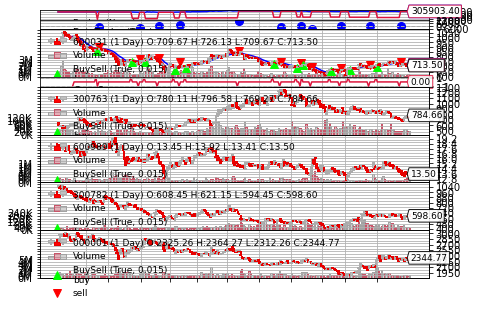

In [33]:
cerebro.plot(style='candlestick')